# Sales Prediction

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [65]:
advertising = pd.DataFrame(pd.read_csv("advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [66]:
advertising.shape

(200, 4)

In [67]:
advertising.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [68]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,195.000000,189.000000,199.000000
mean,147.042500,23.164615,30.077249,15.123116
std,85.854236,14.827306,21.562124,5.296184
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.950000,12.600000,11.000000
50%,149.750000,22.300000,25.600000,16.000000
75%,218.825000,36.550000,45.100000,19.100000
max,296.400000,49.600000,114.000000,27.000000


### Calculate the percentage of missing values for each column. 


In [69]:
advertising.isnull().sum()*100/advertising.shape[0]



TV           0.0
Radio        2.5
Newspaper    5.5
Sales        0.5
dtype: float64

In [70]:
advertising.dropna(inplace=True)

In [71]:
advertising.isnull().sum()*100/advertising.shape[0]


TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

#####  There are no NULL values in the dataset, hence it is clean.

# Outlier Analysis

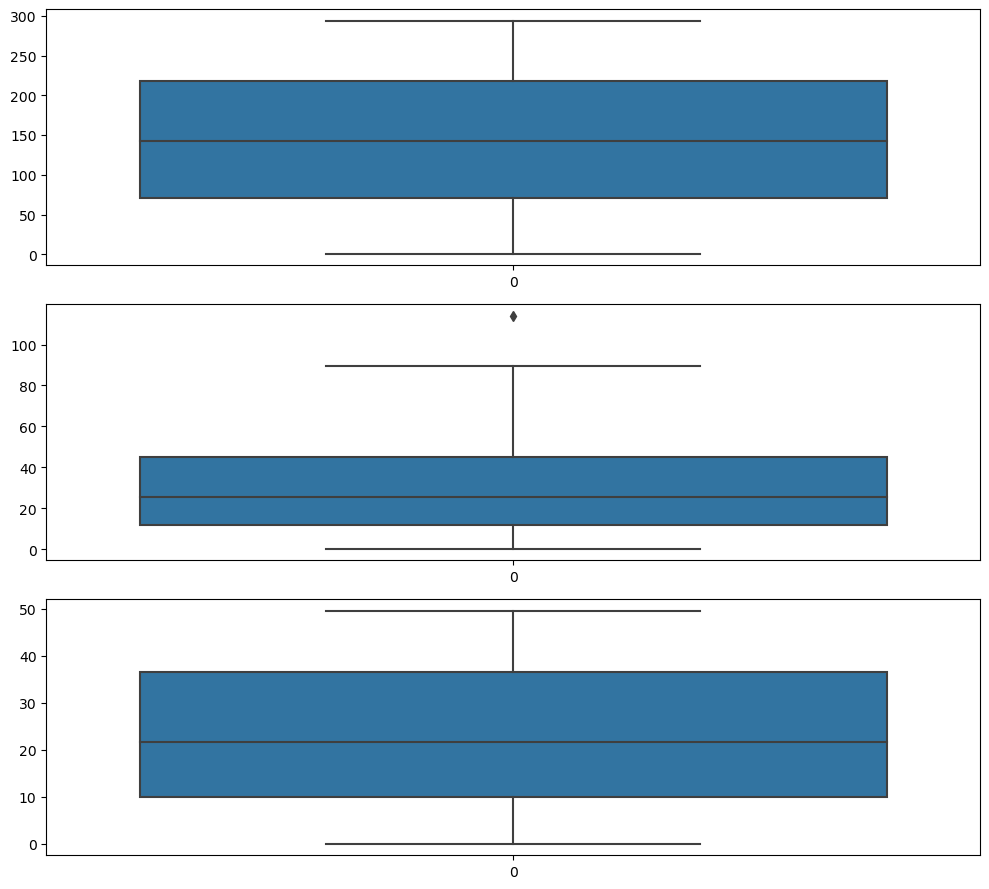

In [72]:

fig, axs = plt.subplots(3, figsize = (10,9))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

## Relationship between different variables

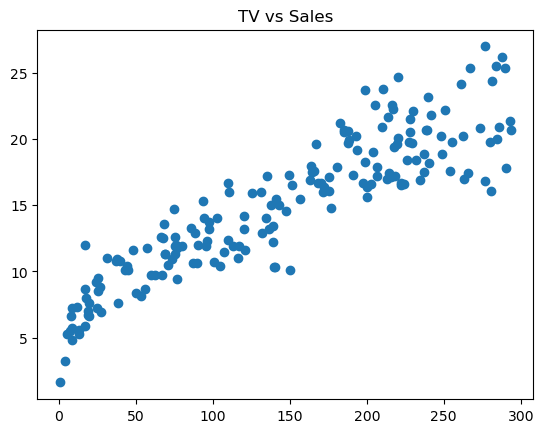

In [73]:
plt.scatter(advertising['TV'], advertising['Sales'])
plt.title('TV vs Sales')
plt.show()

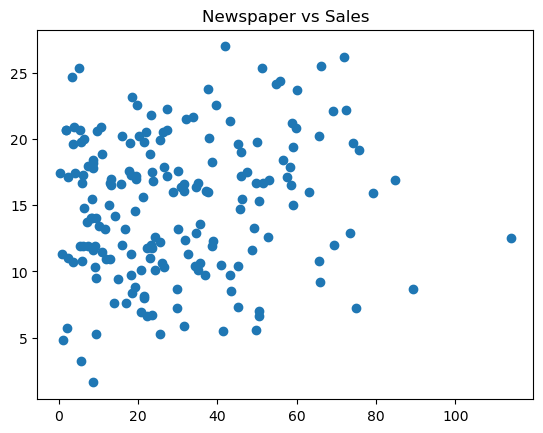

In [74]:
plt.scatter(advertising['Newspaper'], advertising['Sales'])
plt.title('Newspaper vs Sales')
plt.show()

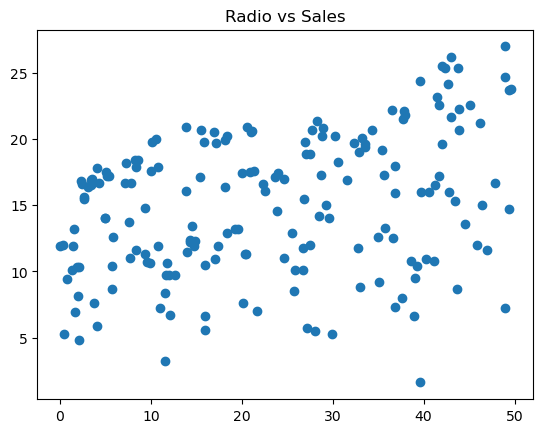

In [75]:
plt.scatter(advertising['Radio'], advertising['Sales'])
plt.title('Radio vs Sales')
plt.show()

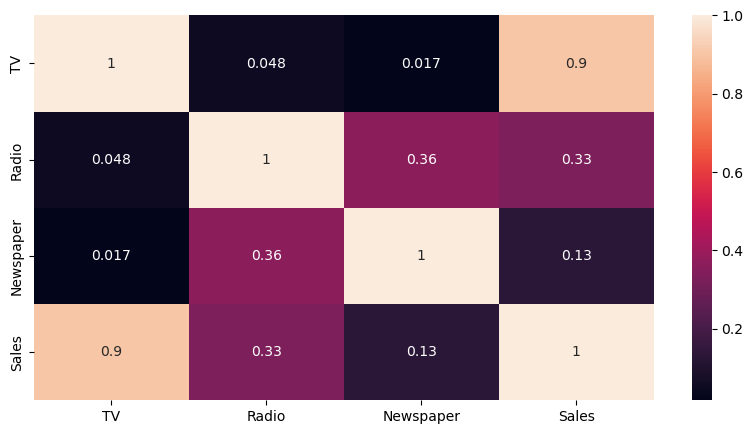

In [76]:
plt.figure(figsize=(10,5))
sns.heatmap(advertising.corr(), annot=True)
plt.show()


### Train-Test Split
* now need to split our variable into training and testing sets. 
* I'll perform this by importing train_test_split from the sklearn.model_selection library. 


In [77]:
X = advertising['TV']
y = advertising['Sales']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

####  the train dataset

In [79]:

X_train.head()

98    289.7
12     23.8
17    281.4
88     88.3
69    216.8
Name: TV, dtype: float64

In [80]:
y_train.head()

98    25.4
12     9.2
17    24.4
88    12.9
69    22.3
Name: Sales, dtype: float64

# Building a Linear Model


In [81]:
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# print(X_train_sm)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [82]:
lr.params

const    6.855561
TV       0.056821
dtype: float64

In [83]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     661.6
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           3.37e-52
Time:                        11:47:41   Log-Likelihood:                -280.31
No. Observations:                 129   AIC:                             564.6
Df Residuals:                     127   BIC:                             570.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8556      0.373     18.362      0.0

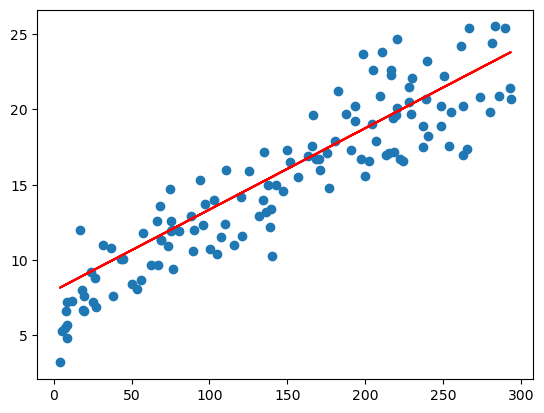

In [84]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.948 + 0.054*X_train, 'r')
plt.show()

In [85]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

/home/lalit/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

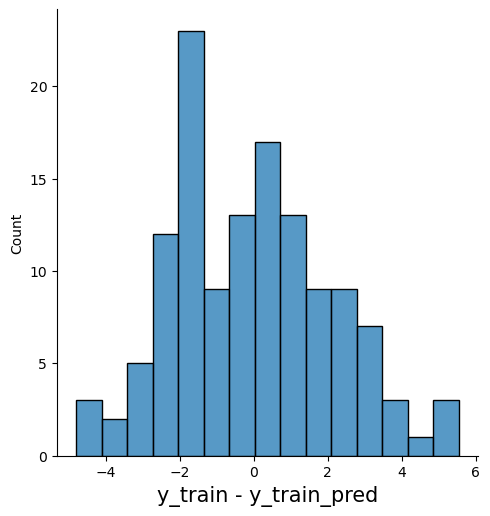

In [86]:
fig = plt.figure()
sns.displot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

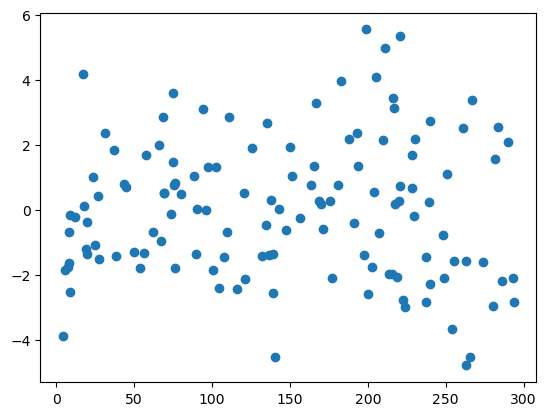

In [87]:
plt.scatter(X_train,res)
plt.show()

### Add a constant to X_test

In [88]:

X_test_sm = sm.add_constant(X_test)



### Predict the y values corresponding to X_test_sm


In [89]:
y_pred = lr.predict(X_test_sm)


In [90]:
y_pred.head()

11    19.055095
84    18.986910
16    10.708045
80    11.196709
50    18.208458
dtype: float64

In [91]:

from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [93]:
print('Mean Absolute Error : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared : ', r2_score(y_test, y_pred))

Mean Absolute Error :  2.0125739554856374
Mean Squared Error :  6.536094301789028
Root Mean Squared Error :  2.556578632037166
R-squared :  0.7573846347279112


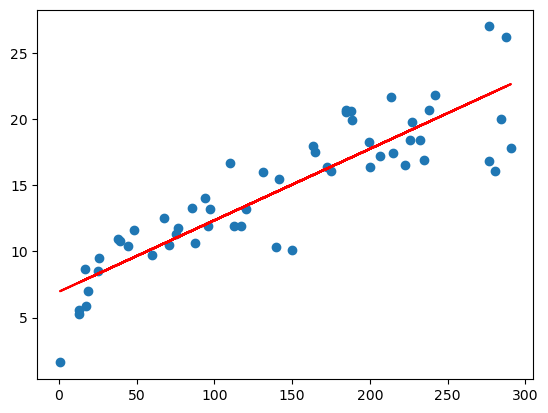

In [94]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()   


<bt><br>
# <center> Thank you!!</center>